In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import keras.backend as K

# determine channel data format of backend
ch_fmt = K.image_data_format()
ch_first = ch_fmt == 'channels_first'

Using Theano backend.


In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

4
(60000, 28, 28)


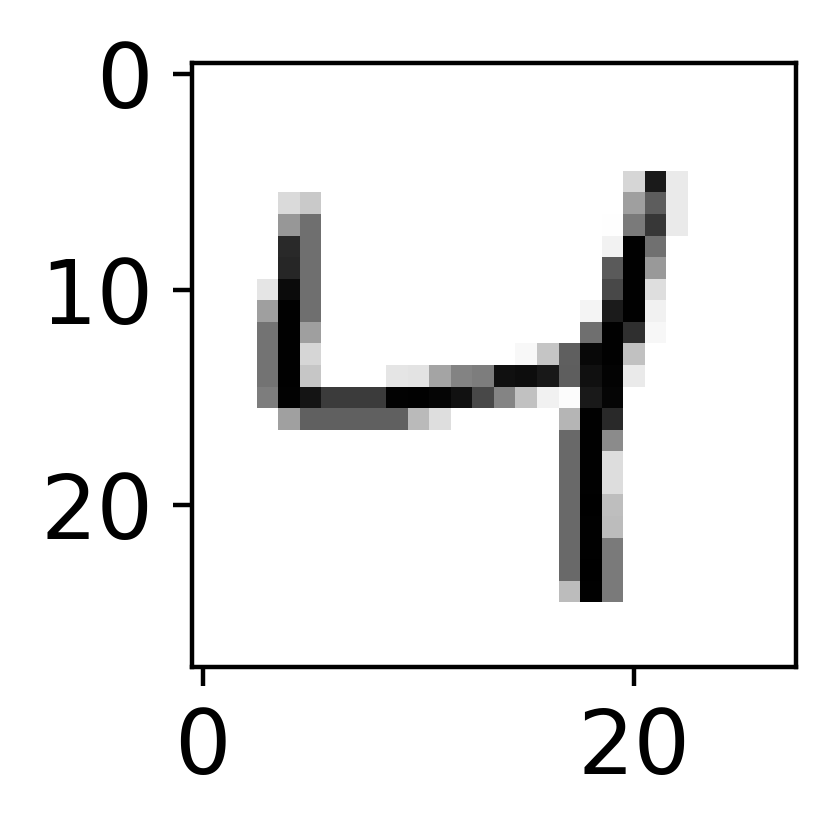

In [7]:
# Let's take a look at the test data

figsize(2,2);
print(y_train[2])
imshow(x_train[2], cmap='Greys')
print(x_train.shape)

In [13]:
# Prepare input data, convert to 1D arrays
import numpy as np
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

print(x_train_flat.shape)

# Determine input shape
input_shape = (x_train_flat.shape[1],)

# Prepare y data, "hot" encoding
y_train_hot = np.zeros((y_train.size, 10))
for i, t in enumerate(y_train):
    y_train_hot[i,t] = 1
    
y_test_hot = np.zeros((y_test.size, 10))
for i, t in enumerate(y_test):
    y_test_hot[i,t] = 1

print(y_train_hot.shape, y_test.shape)
    

(60000, 784)
(60000, 10) (10000,)


In [14]:
# Build the model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

one_layer = Sequential()
one_layer.add(Dense(10, input_shape=input_shape))
one_layer.add(Activation('sigmoid'))

# compile the model into a network
# use stochastic gradient descent as optimizer
# determine loss by squared error
one_layer.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [15]:
# train the network
one_layer.fit(x_train_flat, y_train_hot, batch_size=64, epochs=50, validation_data=(x_test_flat, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 0s - loss: 0.1004 - acc: 0.2606 - val_loss: 0.0842 - val_acc: 0.3501
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 0.0782 - acc: 0.3920 - val_loss: 0.0739 - val_acc: 0.4169
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 0.0712 - acc: 0.4220 - val_loss: 0.0693 - val_acc: 0.4275
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 0.0687 - acc: 0.4415 - val_loss: 0.0676 - val_acc: 0.4415
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 0.0656 - acc: 0.4702 - val_loss: 0.0628 - val_acc: 0.4843
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 0.0621 - acc: 0.4838 - val_loss: 0.0608 - val_acc: 0.4911
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 0.0605 - acc: 0.4882 - val_loss: 0.0593 - val_acc: 0.4954
Epoch 8/50
60000/60000 [==============================] - 0s 

In [16]:
# helper

def plot_pred(p, v, img):
    figsize(10,10)
    f, a = subplots(5,5, sharey=True, sharex=True)
    for i in range(5):
        for j in range(5):
            a[i,j].imshow(img[i*5+j], cmap='Greys')
            if v[i*5+j] == np.argmax(p[i*5+j]):
                c = 'g'
            else:
                c = 'r'            
            a[i,j].text(3, 4, '{}'.format(np.argmax(p[i*5+j])), color=c)

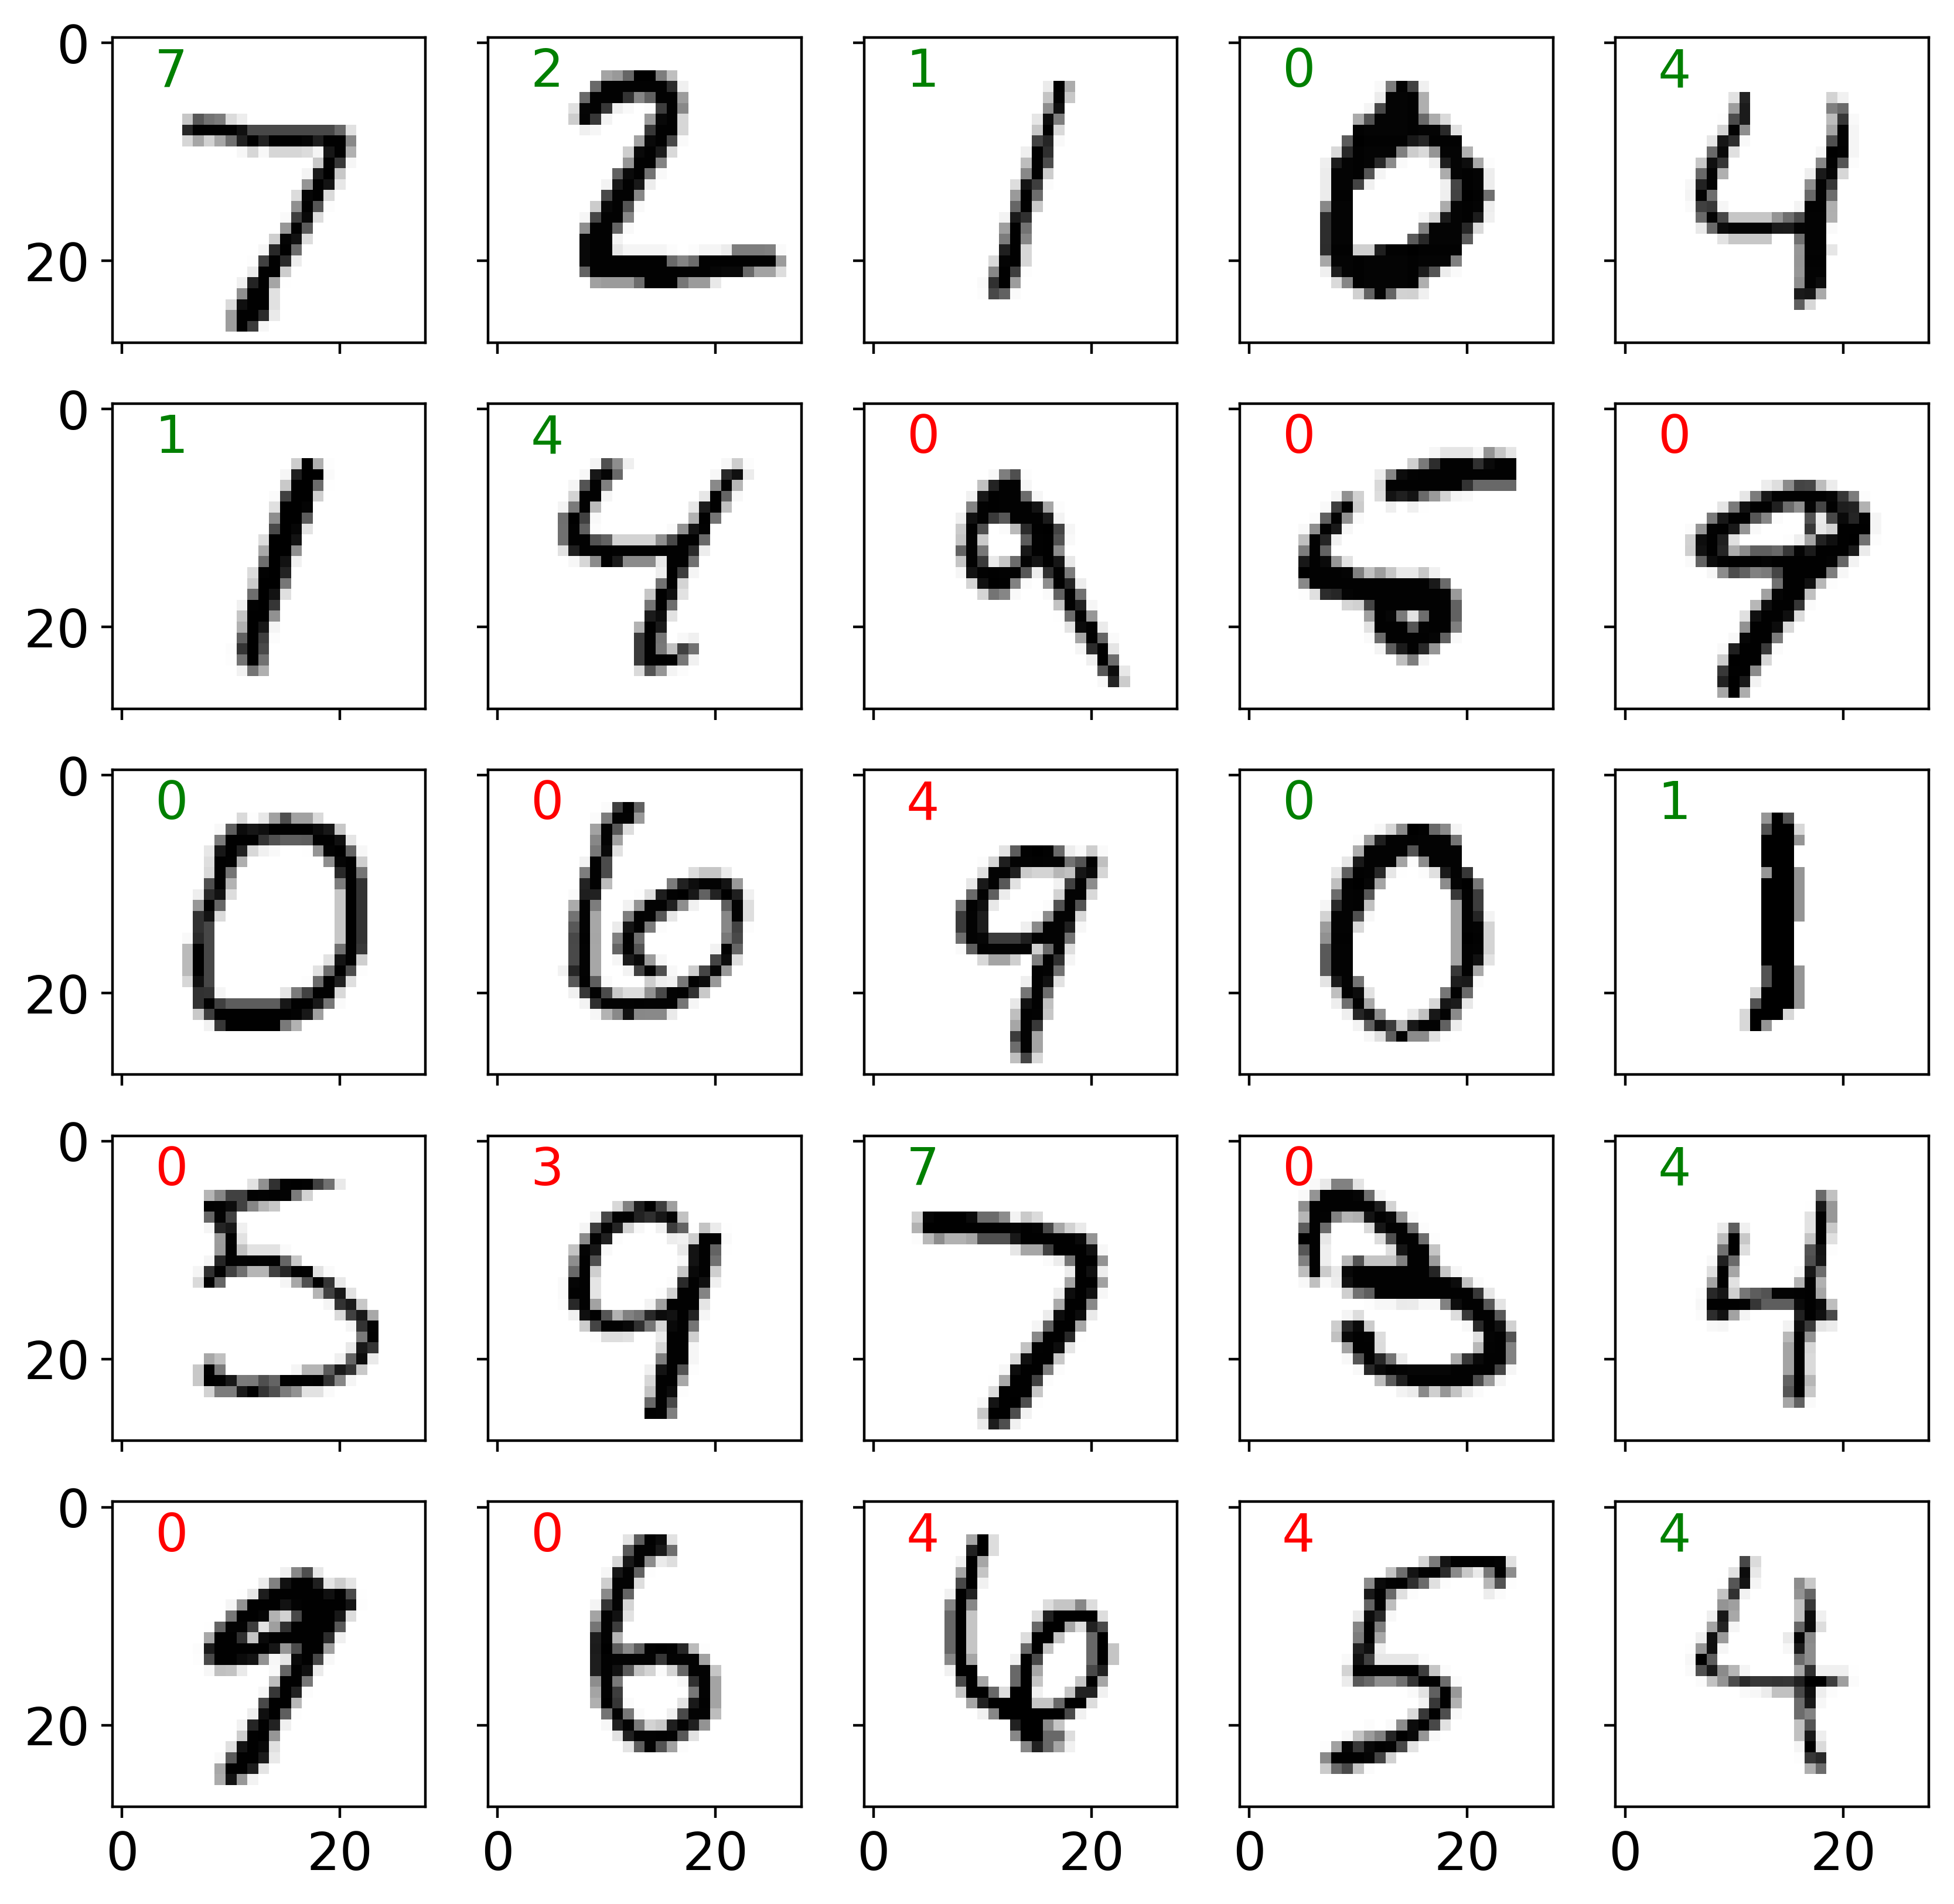

In [17]:
# predict some results
p = one_layer.predict(x_test_flat[:25])

# plot prediction
plot_pred(p, y_test, x_test)

In [34]:
# Improve_model
two_layers = Sequential()
two_layers.add(Dense(1, input_shape=input_shape))
two_layers.add(Activation('sigmoid'))
two_layers.add(Dense(10))
two_layers.add(Activation('sigmoid'))

two_layers.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [35]:
# train the network
two_layers.fit(x_train_flat, y_train_hot, batch_size=64, epochs=50, validation_data=(x_test_flat, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 0s - loss: 0.2328 - acc: 0.1507 - val_loss: 0.2158 - val_acc: 0.1727
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 0.2019 - acc: 0.1823 - val_loss: 0.1892 - val_acc: 0.1873
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 0.1785 - acc: 0.1943 - val_loss: 0.1688 - val_acc: 0.1976
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 0.1603 - acc: 0.2011 - val_loss: 0.1528 - val_acc: 0.2001
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 0.1457 - acc: 0.2053 - val_loss: 0.1393 - val_acc: 0.2046
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 0.1338 - acc: 0.2068 - val_loss: 0.1286 - val_acc: 0.2050
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 0.1242 - acc: 0.2064 - val_loss: 0.1201 - val_acc: 0.2019
Epoch 8/50
60000/60000 [==============================] - 0s 

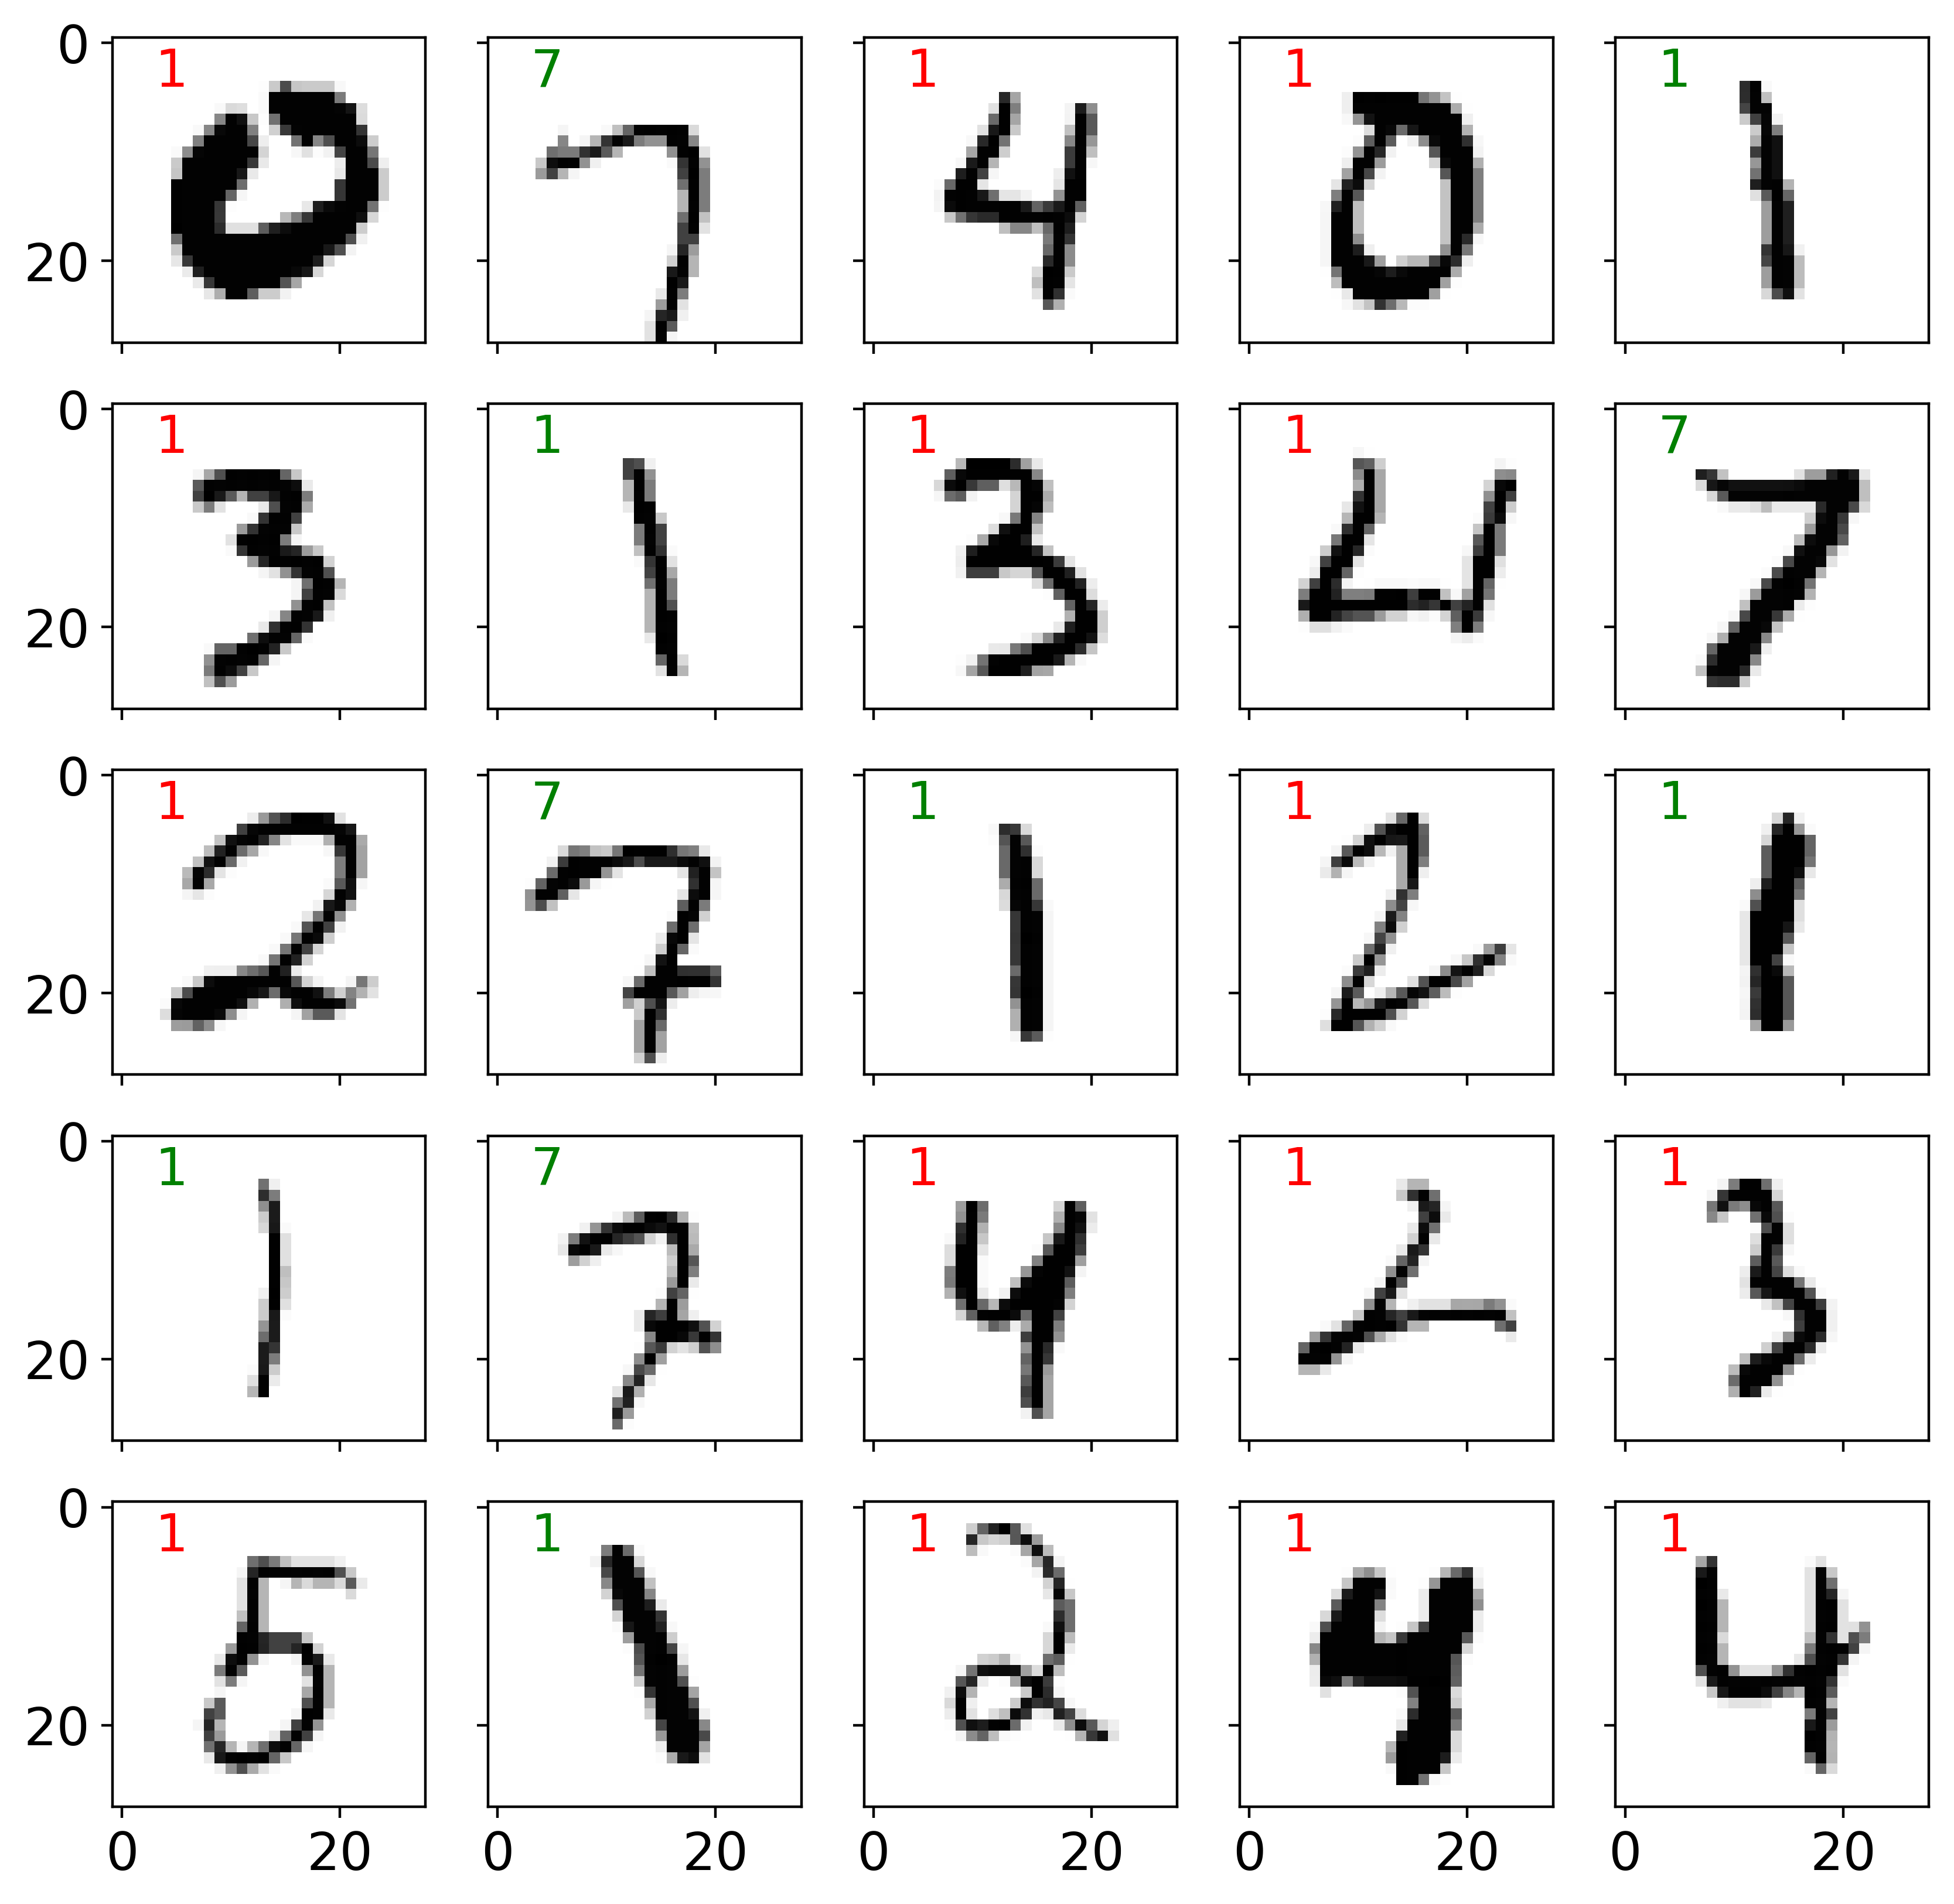

In [36]:
# predict some results
p = two_layers.predict(x_test_flat[25:50])

# plot prediction
plot_pred(p[:25], y_test[25:50], x_test[25:50])